## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/alexl/OneDrive/Desktop/Coursework/Machine Learning/GSS Project/batch_0/result/GSS.csv')

In [3]:
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

(72390, 15) 

year         int64
id_          int64
age         object
educ        object
sex         object
race        object
rincome     object
partyid     object
relig       object
abdefect    object
abrape      object
abany       object
posslqy     object
sexornt     object
ballot      object
dtype: object 

Index(['year', 'id_', 'age', 'educ', 'sex', 'race', 'rincome', 'partyid',
       'relig', 'abdefect', 'abrape', 'abany', 'posslqy', 'sexornt', 'ballot'],
      dtype='object') 



Before coercion: 
 count     72390
unique       75
top          30
freq       1571
Name: age, dtype: object 



<Axes: >

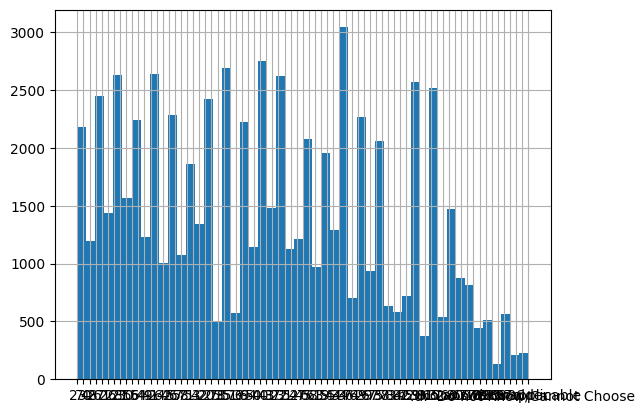

In [4]:
var = 'age' 
print('Before coercion: \n', df['age'].describe(), '\n')
df['age'].hist(bins=50)

After Coercion: 
 count    71212.000000
mean        46.312209
std         17.353604
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         88.000000
Name: age, dtype: float64 

Total Missings: 
 1178 



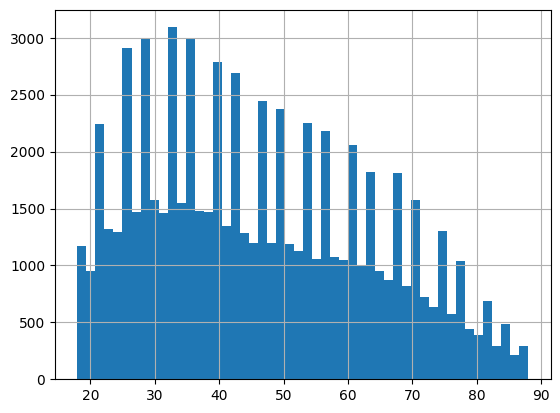

In [5]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age_nan'] = df['age'].isnull()

print('After Coercion: \n', df['age'].describe(), '\n')
df['age'].hist(bins=50)
print('Total Missings: \n', sum(df['age_nan']), '\n')

In [6]:
print(df['sex'].describe(), '\n')
print(df['sex'].unique(), '\n')

count      72390
unique         6
top       FEMALE
freq       40301
Name: sex, dtype: object 

['FEMALE' 'MALE' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 



count      72390
unique         3
top       FEMALE
freq       40301
Name: sex, dtype: object
After Coercion: 
 ['FEMALE', 'MALE', 'Unknown']
Categories (3, object): ['FEMALE', 'MALE', 'Unknown'] 



<Axes: >

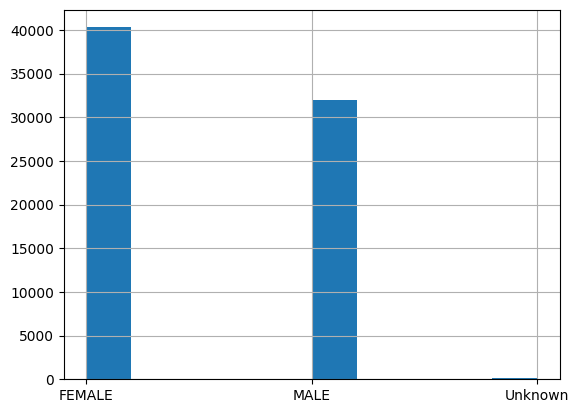

In [7]:
var = 'sex'
df[var] = df[var].replace(('.n:  No answer', '.i:  Inapplicable', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'), 'Unknown')
print(df[var].describe())
df[var] = pd.Categorical(df[var])
print('After Coercion: \n', df[var].unique(), '\n')
df[var].hist()

['White' 'Black' 'Other' '.i:  Inapplicable'] 

count     72390
unique        4
top       White
freq      57657
Name: race, dtype: object 

After Coercion: 
 ['White', 'Black', 'Other', '.i:  Inapplicable']
Categories (4, object): ['.i:  Inapplicable', 'Black', 'Other', 'White'] 



<Axes: >

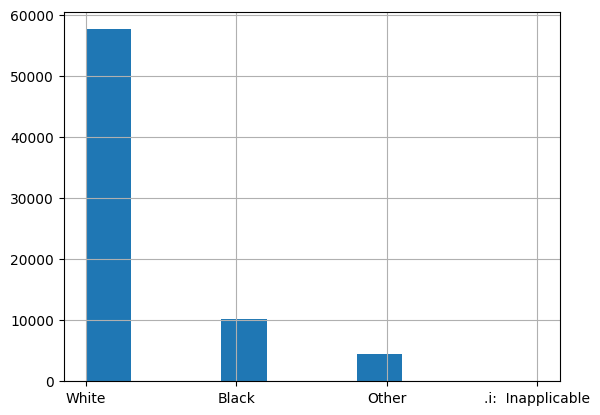

In [8]:
print(df['race'].unique(), '\n')
print(df['race'].describe(), '\n')
df['race'] = pd.Categorical(df['race'])
print('After Coercion: \n', df['race'].unique(), '\n')
df['race'].hist()

It's pretty weird that there's only two races listed here...

In [9]:
var = 'rincome'
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
df[var] = df[var].str.replace('$','')
df[var] = df[var].str.replace(' TO ','-')
df[var] = df[var].str.replace('LT','Less than')
df[var] = df[var].replace(('.d:  Do not Know/Cannot Choose','.r:  Refused', '.n:  No answer', '.s:  Skipped on Web'),'Unknown')
df[var] = pd.Categorical(df[var])
print(df[var].unique(), '\n')

count                 72390
unique                   17
top       .i:  Inapplicable
freq                  25799
Name: rincome, dtype: object 

['.i:  Inapplicable' '$1000 TO 2999' '$15000 - 19999' '$7000 TO 7999'
 '$8000 TO 9999' '$20000 - 24999' '$4000 TO 4999'
 '.d:  Do not Know/Cannot Choose' '$10000 - 14999' '$25000 OR MORE'
 '$3000 TO 3999' 'LT $1000' '$5000 TO 5999' '$6000 TO 6999' '.r:  Refused'
 '.n:  No answer' '.s:  Skipped on Web'] 

['.i:  Inapplicable', '1000-2999', '15000 - 19999', '7000-7999', '8000-9999', ..., '25000 OR MORE', '3000-3999', 'Less than 1000', '5000-5999', '6000-6999']
Length: 14
Categories (14, object): ['.i:  Inapplicable', '1000-2999', '10000 - 14999', '15000 - 19999', ..., '7000-7999', '8000-9999', 'Less than 1000', 'Unknown'] 



In [10]:
var = 'partyid'
print(df[var].describe(), '\n')
print(df[var].unique())
df[var] = df[var].replace(('Not very strong democrat','Strong democrat','Independent, close to democrat'), 'Left Leaning')
df[var] = df[var].replace(('Not very strong republican','Strong republican','Independent, close to republican'), 'Right Leaning')
df[var] = df[var].replace(('Independent (neither, no response)','Other party', '.n:  No answer','.d:  Do not Know/Cannot Choose'), 'Independent/Other')


count                        72390
unique                          10
top       Not very strong democrat
freq                         14286
Name: partyid, dtype: object 

['Independent, close to democrat' 'Not very strong democrat'
 'Independent (neither, no response)' 'Strong democrat'
 'Not very strong republican' 'Independent, close to republican'
 'Strong republican' 'Other party' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose']


In [11]:
df['partyid'] = pd.Categorical(df['partyid'])
df['partyid'].unique()

['Left Leaning', 'Independent/Other', 'Right Leaning']
Categories (3, object): ['Independent/Other', 'Left Leaning', 'Right Leaning']

In [12]:
var = 'educ'
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
#df[var] = df[var].replace(())

count          72390
unique            23
top       12th grade
freq           21401
Name: educ, dtype: object 

['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' '.n:  No answer'
 'No formal schooling' '.d:  Do not Know/Cannot Choose'] 



In [13]:
var = 'educ'
df[var] = df[var].str.replace('th grade','')
df[var] = df[var].str.replace('nd grade','')
df[var] = df[var].str.replace('st grade','')
df[var] = df[var].str.replace('rd grade','')
df[var] = df[var].str.replace('No formal schooling', '0')
df[var] = df[var].str.replace('.n:  No answer', 'Unknown')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Unknown')

In [14]:
var = 'educ'
def replace_years_of_college(value):
    if ' years of college' in value:
        num_years = int(value.split()[0])
        return str(12 + num_years)
    return value

df[var] = df[var].apply(replace_years_of_college)

In [15]:
var = 'educ'
def replace_year_of_college(value):
    if ' year of college' in value:
        num_years = int(value.split()[0])
        return str(12 + num_years)
    return value

df[var] = df[var].apply(replace_year_of_college)

In [16]:
var = 'educ'
print(df[var].value_counts())
print(df[var].unique())

educ
12         21401
16          9994
14          8208
13          5905
11          3942
15          3307
10          3010
18          2945
8           2786
17          2392
9           2172
20          1803
19          1112
7            896
6            866
5            410
4            326
3            268
Unknown      263
0            177
2            158
1             49
Name: count, dtype: int64
['16' '10' '12' '17' '14' '13' '6' '9' '8' '11' '7' '15' '20' '18' '3' '2'
 '4' '5' '19' '1' 'Unknown' '0']


count    72127.000000
mean        13.034633
std          3.182372
min          0.000000
25%         12.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: educ, dtype: float64 



<Axes: >

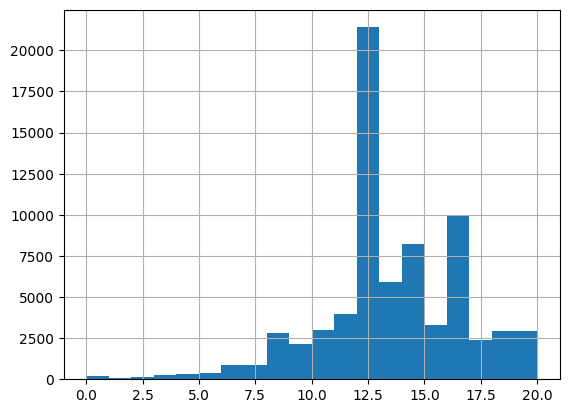

In [17]:
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
print(df['educ'].describe(), '\n')
df['educ'].hist(bins=20)

In [19]:
var = 'relig'
print(df[var].value_counts())

relig
Protestant                        40124
Catholic                          17242
Jewish                             1422
Other                              1224
Christian                          1000
.n:  No answer                      337
Buddhism                            272
Muslim/islam                        201
Orthodox-christian                  176
Inter-nondenominational             159
Hinduism                            158
.d:  Do not Know/Cannot Choose       59
Other eastern religions              44
.s:  Skipped on Web                  41
Native american                      36
Name: count, dtype: int64


In [20]:
var = 'relig'
df[var] = df[var].replace('.n:  No answer', 'Unknown')
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', 'Unknown')
df[var] = df[var].replace('.s:  Skipped on Web', 'Unknown')
df[var] = pd.Categorical(df[var])

<Axes: >

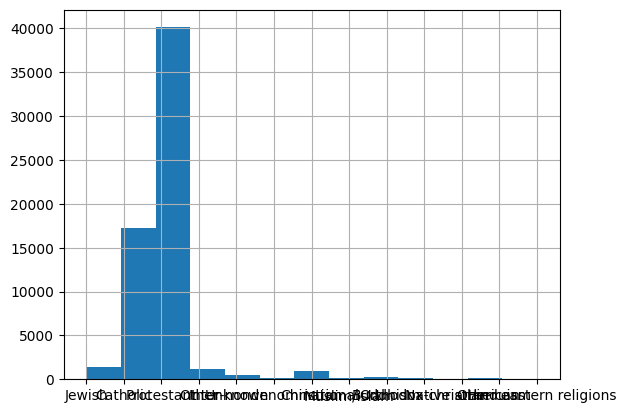

In [ ]:
df['relig'].describe()
df['relig'].hist(bins=13)

In [23]:
print(df.dtypes, '\n')

year           int64
id_            int64
age          float64
educ         float64
sex         category
race        category
rincome     category
partyid     category
relig       category
abdefect      object
abrape        object
abany         object
posslqy       object
sexornt       object
ballot        object
age_nan         bool
dtype: object 



In [27]:
var = 'sexornt'
df[var] = df[var].str.replace('.i:  Inapplicable', 'Unknown')
df[var] = df[var].str.replace('.n:  No answer', 'Unknown')
df[var] = df[var].str.replace('.d:  Do not Know/Cannot Choose', 'Unknown')
df[var] = df[var].str.replace('.s:  Skipped on Web', 'Unknown')
df[var] = pd.Categorical(df[var])
print(df[var].unique())

['Unknown', 'Heterosexual or straight', 'Gay, lesbian, or homosexual', 'Bisexual']
Categories (4, object): ['Bisexual', 'Gay, lesbian, or homosexual', 'Heterosexual or straight', 'Unknown']
